 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Use Pathlib libary to set the path to csv file
whale_path = Path("Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_return_df = pd.read_csv(whale_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_return_df = whale_return_df.sort_values(by="Date")
whale_return_df.head(-10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-10,0.009808,0.008366,0.002912,0.005269
2019-04-11,0.003406,-0.003959,-0.000637,-0.000496
2019-04-12,0.005663,-0.001165,0.004217,0.007316


In [4]:
# Count nulls
whale_return_df.isnull()
whale_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_return_df.dropna(inplace = True)

In [6]:
# Confirm if null record has been droped
whale_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algorithmic_path = Path("Resources/algo_returns.csv")
algorithmic_return_df = pd.read_csv(algorithmic_path,index_col = "Date", infer_datetime_format=True, parse_dates=True)
algorithmic_return_df= algorithmic_return_df.sort_values(by="Date")
algorithmic_return_df.head(-10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-10,-0.004221,0.009632
2019-04-11,0.001705,-0.001568
2019-04-12,-0.005501,0.004504


In [8]:
# Count nulls
algorithmic_return_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algorithmic_return_df.dropna(inplace = True)

In [10]:
# Confirm if null record has been droped
algorithmic_return_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
algorithmic_return_df = algorithmic_return_df.rename(columns = {"Algo 1" : "ALGO 1", "Algo 2" : "AlGO 2"})
algorithmic_return_df.head()

,ALGO 1,AlGO 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P TSX 60 Closing Prices
sptsx_path = Path("Resources/sp_tsx_history.csv")
sptsx_return_df = pd.read_csv(sptsx_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
sptsx_return_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
# Drop nulls
sptsx_return_df.isnull().sum()

Close    0
dtype: int64

In [14]:
# Fix Data Types
sptsx_return_df["Close"] = sptsx_return_df["Close"].str.replace('$','')
sptsx_return_df["Close"] = sptsx_return_df["Close"].str.replace(',','')
sptsx_return_df["Close"]

C:\Users\HOANG\AppData\Local\Temp/ipykernel_40324/2019775301.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sptsx_return_df["Close"] = sptsx_return_df["Close"].str.replace('$','')


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [15]:
# Convert in to float data
sptsx_return_df["Close"] = sptsx_return_df["Close"].astype("float")
sptsx_return_df.dtypes

Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
sptsx_return_df = sptsx_return_df.pct_change()
sptsx_return_df.head(-10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-06,0.008428
2019-12-09,-0.002713
2019-12-10,-0.000009


In [17]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_return_df = sptsx_return_df.rename(columns = {"Close": "SPTSX"})
sptsx_return_df = sptsx_return_df.sort_values(by="Date")
sptsx_return_df.head(-10)

,SPTSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-06,0.008428
2019-12-09,-0.002713
2019-12-10,-0.000009


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
data_combined = pd.concat([whale_return_df,algorithmic_return_df,sptsx_return_df],axis= 1, join = "inner")
data_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,AlGO 2,SPTSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

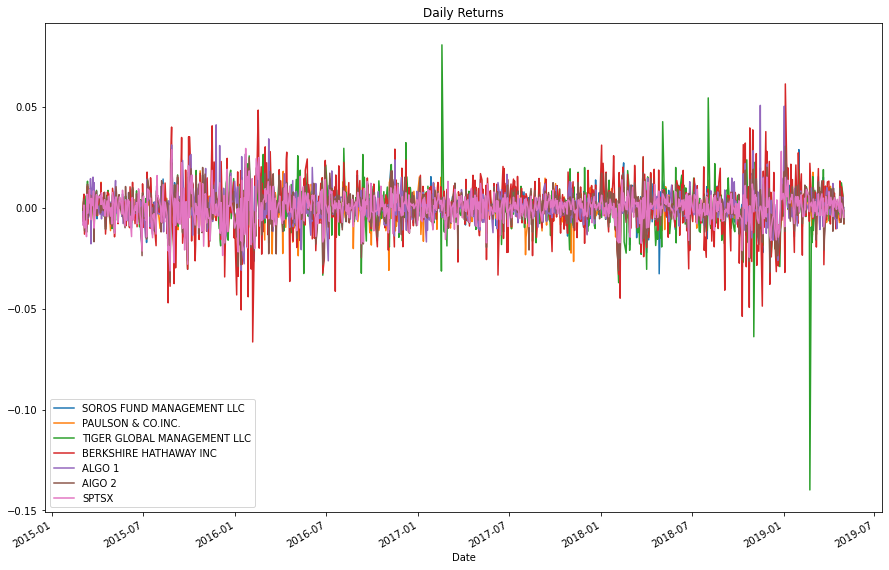

In [19]:
# Plot daily returns of all portfolios
data_combined.plot(figsize = (15,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

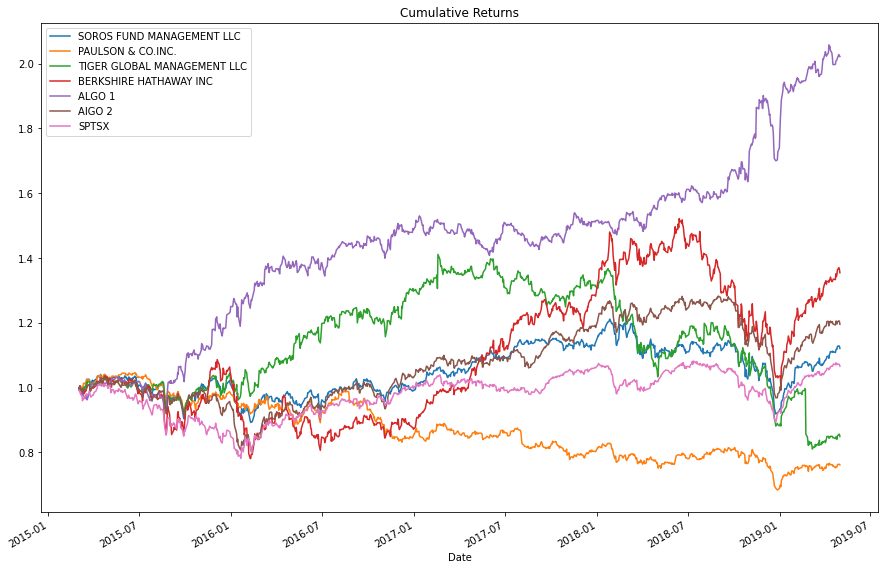

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + data_combined).cumprod() 
# Plot cumulative returns
cumulative_returns.plot(figsize = (15,10), title = "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot of Returns'}>

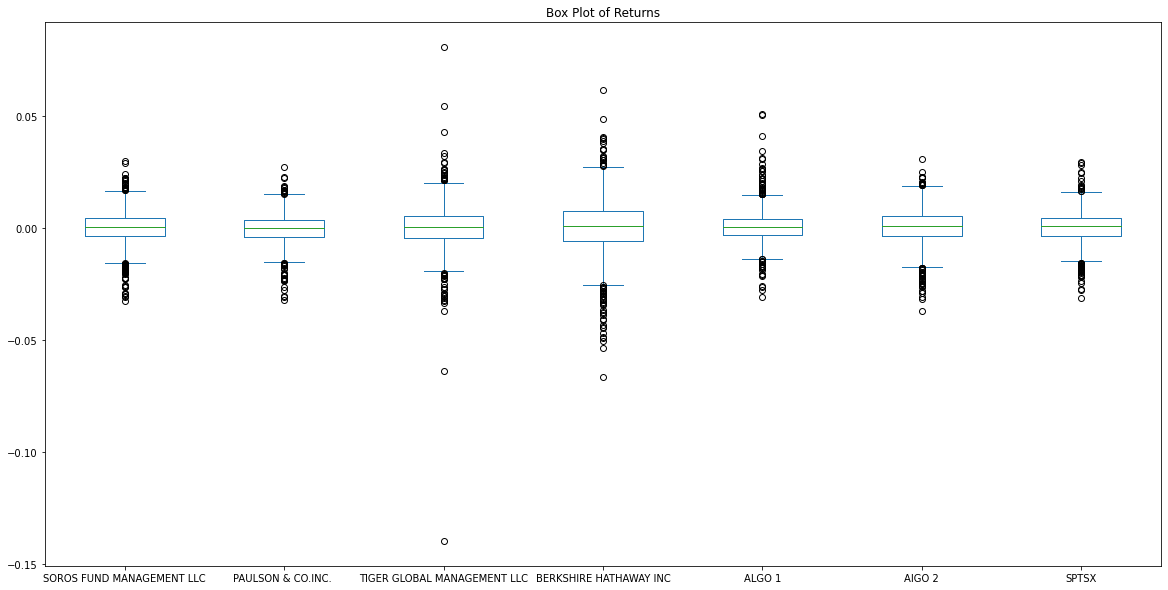

In [21]:
# Box plot to visually show risk
data_combined.plot.box(figsize = (20,10), title = "Box Plot of Returns")

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
daily_std = data_combined.std()
daily_std.sort_values()

PAULSON & CO.INC.              0.006982
SPTSX                          0.007034
ALGO 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
AlGO 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

In [23]:
df_std = daily_std.to_frame( name = "Standard Deviation")
df_std 

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
ALGO 1,0.007589
AlGO 2,0.008326
SPTSX,0.007034


In [24]:
df_std.dtypes

Standard Deviation    float64
dtype: object

### Determine which portfolios are riskier than the S&P TSX 60

In [25]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_std = data_combined["SPTSX"].std()
print(f"Daily standard deviation of S&P TSX 60 is {sptsx_std}")

Daily standard deviation of S&P TSX 60 is 0.007034167748577725


In [26]:
# Determine which portfolios are riskier than the S&P TSX 60
df_std["Riskier Portfolio"] = df_std["Standard Deviation"].apply(lambda x: 'True' if x > sptsx_std else 'False')
df_std

,Standard Deviation,Riskier Portfolio
SOROS FUND MANAGEMENT LLC,0.007828,True
PAULSON & CO.INC.,0.006982,False
TIGER GLOBAL MANAGEMENT LLC,0.010883,True
BERKSHIRE HATHAWAY INC,0.012826,True
ALGO 1,0.007589,True
AlGO 2,0.008326,True
SPTSX,0.007034,False


### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
ALGO 1                         0.120470
AlGO 2                         0.132177
SPTSX                          0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day standard deviation'}, xlabel='Date'>

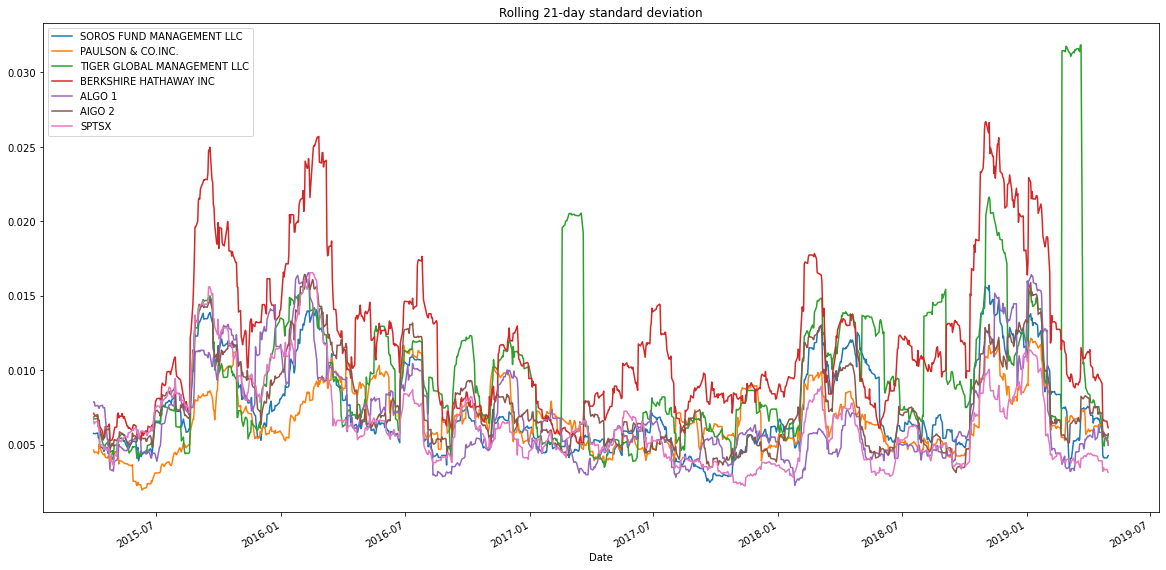

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = data_combined.rolling(window = 21).std()
rolling_std
# Plot the rolling standard deviation
rolling_std.plot(figsize = (20,10), title = "Rolling 21-day standard deviation")

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
correlation = data_combined.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,AlGO 2,SPTSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
ALGO 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
AlGO 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SPTSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [30]:
# Calculate covariance of a single portfolio
rolling_covariance_brk = data_combined["BERKSHIRE HATHAWAY INC"].rolling(window = 60).cov(data_combined["SPTSX"])

In [31]:
# Calculate variance of S&P TSX
rolling_variance = data_combined["SPTSX"].rolling(window = 60).var()

In [32]:
# Computing beta
rolling_beta_brk = rolling_covariance_brk / rolling_variance

<AxesSubplot:title={'center':'Rolling 60 days Beta of Bershire Hathaway'}, xlabel='Date'>

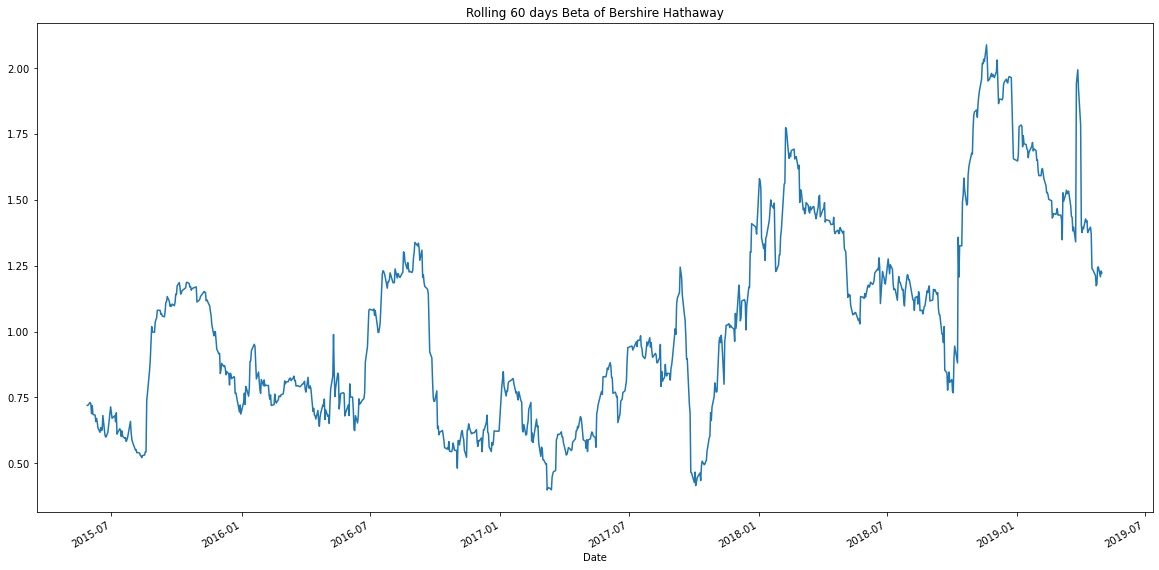

In [33]:
# Plot beta trend
rolling_beta_brk.plot(figsize = (20,10), title = "Rolling 60 days Beta of Bershire Hathaway")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [34]:
# Use `ewm` to calculate the rolling window
ewm_data_combined=data_combined.ewm(halflife = 21).mean()
ewm_data_combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,AlGO 2,SPTSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436
...,...,...,...,...,...,...,...
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = (data_combined.mean() * 252)/annualized_std
annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
ALGO 1                         1.491514
AlGO 2                         0.396817
SPTSX                          0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

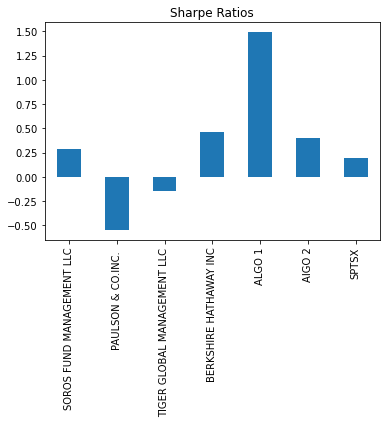

In [36]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [37]:
# With the highest Sharpe Ratio, Algo1 has outperformed all others portfolios. While Sharpe Ratio of Algo 2 is only less than the ratios of Bershire Haltthaway
# and algo 1. Therefore, algorithemic strategy outperformed during this period.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [38]:
# Reading data from 1st stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
aapl_df.head()

,Close
Date,
2015-03-03 16:00:00,32.34
2015-03-04 16:00:00,32.14
2015-03-05 16:00:00,31.60
2015-03-06 16:00:00,31.65
2015-03-09 16:00:00,31.79


In [39]:
aapl_df = aapl_df.rename(columns = {"Close" : "AAPL"})
aapl_df

,AAPL
Date,
2015-03-03 16:00:00,32.34
2015-03-04 16:00:00,32.14
2015-03-05 16:00:00,31.60
2015-03-06 16:00:00,31.65
2015-03-09 16:00:00,31.79
...,...
2019-04-25 16:00:00,51.32
2019-04-26 16:00:00,51.08
2019-04-29 16:00:00,51.15


In [40]:
# Reading data from 2nd stock
goog_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
goog_df.head()

,Close
Date,
2015-03-03 16:00:00,572.07
2015-03-04 16:00:00,571.80
2015-03-05 16:00:00,573.75
2015-03-06 16:00:00,566.13
2015-03-09 16:00:00,567.29


In [41]:
goog_df = goog_df.rename(columns = {"Close" : "GOOG"})
goog_df

,GOOG
Date,
2015-03-03 16:00:00,572.07
2015-03-04 16:00:00,571.80
2015-03-05 16:00:00,573.75
2015-03-06 16:00:00,566.13
2015-03-09 16:00:00,567.29
...,...
2019-04-25 16:00:00,1263.45
2019-04-26 16:00:00,1272.18
2019-04-29 16:00:00,1287.58


In [42]:
# Reading data from 3rd stock
amzn_csv = Path("Resources/amzn_historical.csv")
amzn_df = pd.read_csv(amzn_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
amzn_df.head()

,Close
Date,
2015-03-03 16:00:00,384.61
2015-03-04 16:00:00,382.72
2015-03-05 16:00:00,387.83
2015-03-06 16:00:00,380.09
2015-03-09 16:00:00,378.56


In [43]:
amzn_df = amzn_df.rename(columns = {"Close" : "AMZN"})
amzn_df

,AMZN
Date,
2015-03-03 16:00:00,384.61
2015-03-04 16:00:00,382.72
2015-03-05 16:00:00,387.83
2015-03-06 16:00:00,380.09
2015-03-09 16:00:00,378.56
...,...
2019-04-25 16:00:00,1902.25
2019-04-26 16:00:00,1950.63
2019-04-29 16:00:00,1938.43


In [44]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([aapl_df, goog_df,amzn_df], axis = 1, join = "inner")
my_portfolio.head()

,AAPL,GOOG,AMZN
Date,,,
2015-03-03 16:00:00,32.34,572.07,384.61
2015-03-04 16:00:00,32.14,571.80,382.72
2015-03-05 16:00:00,31.60,573.75,387.83
2015-03-06 16:00:00,31.65,566.13,380.09
2015-03-09 16:00:00,31.79,567.29,378.56


In [46]:
# Reset Date index
my_portfolio.index = my_portfolio.index.date

In [47]:
# my_portfolio.reset_index(inplace = True)
my_portfolio.head()

,AAPL,GOOG,AMZN
2015-03-03,32.34,572.07,384.61
2015-03-04,32.14,571.80,382.72
2015-03-05,31.60,573.75,387.83
2015-03-06,31.65,566.13,380.09
2015-03-09,31.79,567.29,378.56


In [46]:
my_portfolio.columns

Index(['Date', 'AAPL', 'GOOG', 'AMZN'], dtype='object')

In [47]:
# my_portfolio['Date'] = my_portfolio['Date'].dt.date
# my_portfolio.head()

,Date,AAPL,GOOG,AMZN
0,2015-03-03,32.34,572.07,384.61
1,2015-03-04,32.14,571.80,382.72
2,2015-03-05,31.60,573.75,387.83
3,2015-03-06,31.65,566.13,380.09
4,2015-03-09,31.79,567.29,378.56


In [48]:
# my_portfolio = my_portfolio.set_index(my_portfolio["Date"])
# del my_portfolio['Date']
# my_portfolio.head()


In [49]:
my_portfolio.dtypes


AAPL    float64
GOOG    float64
AMZN    float64
dtype: object

In [50]:
# Drop NAs
my_portfolio.isnull().sum()
my_portfolio.dropna(inplace = True)

In [51]:
# Calculate daily returns
my_daily_returns = my_portfolio.pct_change()
my_daily_returns

,AAPL,GOOG,AMZN
2015-03-03,NaN,NaN,NaN
2015-03-04,-0.006184,-0.000472,-0.004914
2015-03-05,-0.016801,0.003410,0.013352
2015-03-06,0.001582,-0.013281,-0.019957
2015-03-09,0.004423,0.002049,-0.004025
...,...,...,...
2019-04-25,-0.009075,0.005932,0.000263
2019-04-26,-0.004677,0.006910,0.025433
2019-04-29,0.001370,0.012105,-0.006254
2019-04-30,-0.019159,-0.076966,-0.006144


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_daily_returns.dot(weights)
# Display sample data
my_portfolio_returns.head()

2015-03-03         NaN
2015-03-04   -0.003857
2015-03-05   -0.000013
2015-03-06   -0.010552
2015-03-09    0.000816
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_returns = pd.concat([data_combined,my_portfolio_returns], axis = 1, join = "inner")
all_portfolios_returns.head()

C:\Users\HOANG\anaconda3\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,AlGO 2,SPTSX,0
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.003857
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.000013
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.010552
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.000816


In [54]:
all_portfolios_returns.rename(columns = {0 : "MY PORTFOLIO"}, inplace = True)
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,AlGO 2,SPTSX,MY PORTFOLIO
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.003857
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.000013
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.010552
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.000816


In [55]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_returns.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [56]:
# Calculate the annualized `std`
annualized_std_all_portfolio = all_portfolios_returns.std()*np.sqrt(252)
annualized_std_all_portfolio

SOROS FUND MANAGEMENT LLC      0.124317
PAULSON & CO.INC.              0.110870
TIGER GLOBAL MANAGEMENT LLC    0.172843
BERKSHIRE HATHAWAY INC         0.203669
ALGO 1                         0.120521
AlGO 2                         0.132240
SPTSX                          0.111637
MY PORTFOLIO                   0.220218
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 days standard deviation of all portfolios'}>

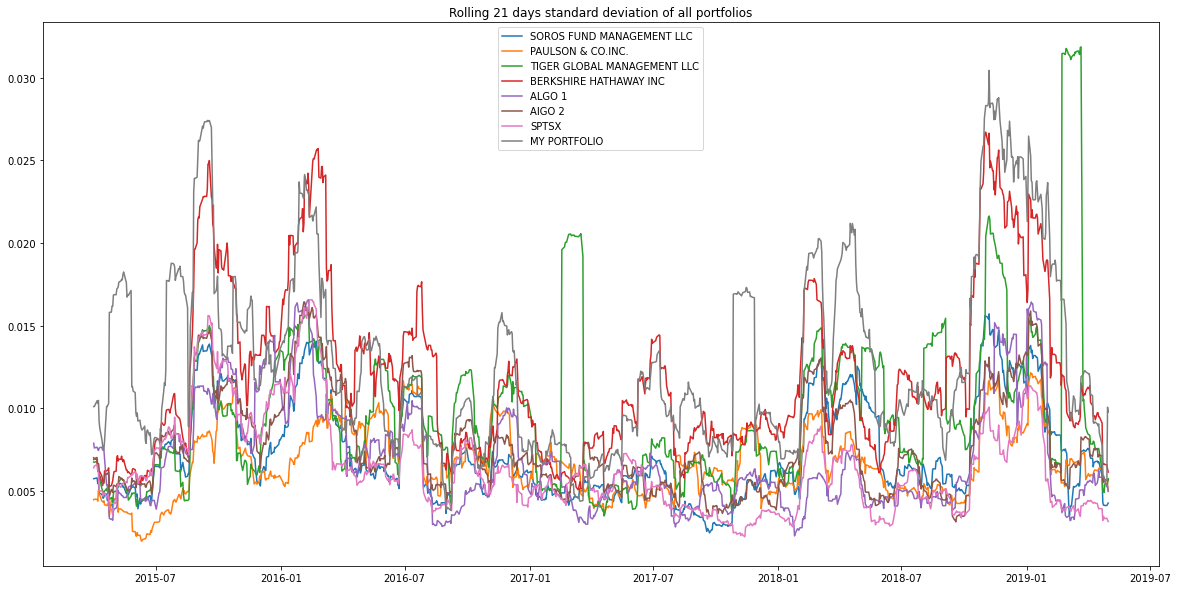

In [57]:
# Calculate rolling standard deviation
rolling_std_all = all_portfolios_returns.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_std_all.plot(figsize = (20,10), title = "Rolling 21 days standard deviation of all portfolios")

### Calculate and plot the correlation

<AxesSubplot:>

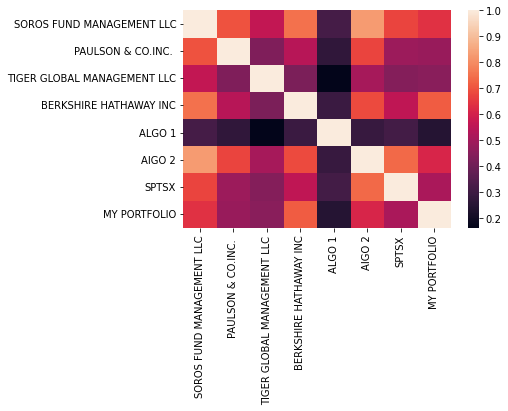

In [58]:
# Calculate and plot the correlation
all_portfolio_correlation = all_portfolios_returns.corr()
sns.heatmap(all_portfolio_correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60 day Beta of my portfolio'}>

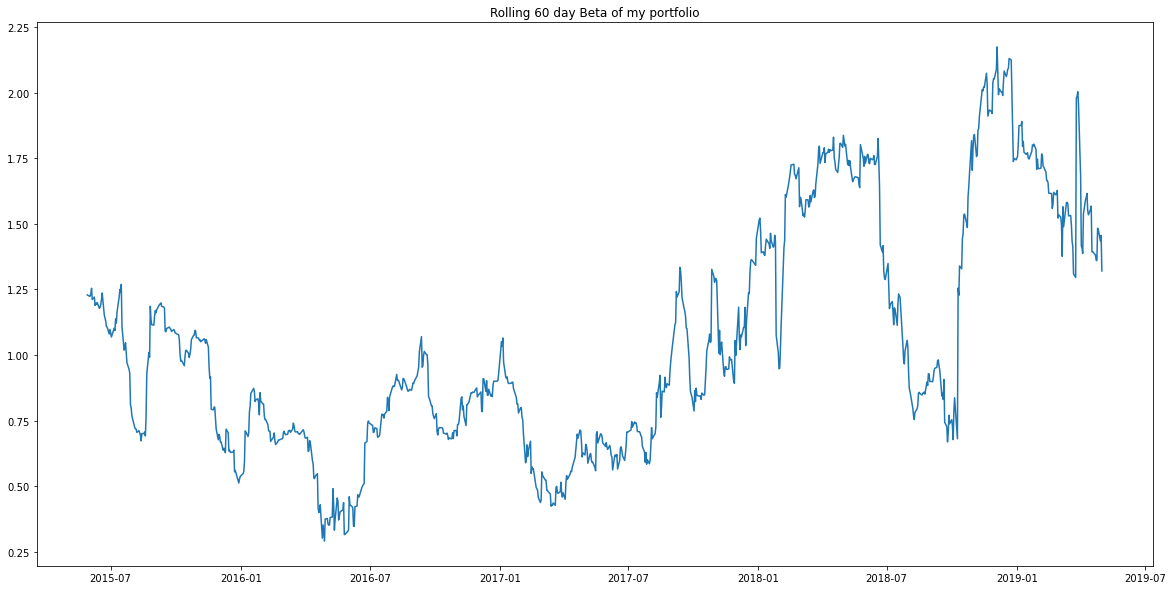

In [59]:
# Calculate and plot Beta
rolling_covariance_myport = all_portfolios_returns["MY PORTFOLIO"].rolling(window = 60).cov(all_portfolios_returns["SPTSX"])
rolling_variance_myport = all_portfolios_returns["SPTSX"].rolling(window = 60).var()
rolling_beta_myport = rolling_covariance_myport / rolling_variance_myport
rolling_beta_myport.plot(figsize = (20,10), title = "Rolling 60 day Beta of my portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Calculate Annualized Sharpe Ratios
annualized_sharpe_ratios_all = (all_portfolios_returns.mean() * 252)/annualized_std_all_portfolio
annualized_sharpe_ratios_all

SOROS FUND MANAGEMENT LLC      0.289348
PAULSON & CO.INC.             -0.536971
TIGER GLOBAL MANAGEMENT LLC   -0.143823
BERKSHIRE HATHAWAY INC         0.475245
ALGO 1                         1.496278
AlGO 2                         0.398774
SPTSX                          0.214519
MY PORTFOLIO                   1.033498
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

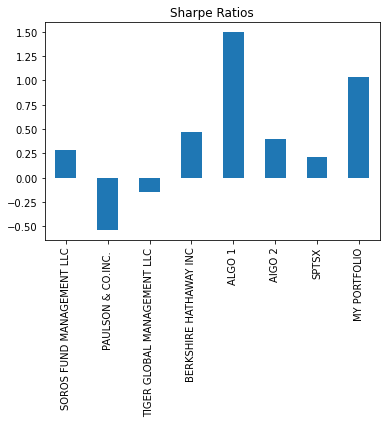

In [61]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios_all.plot(kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [62]:
# My portfolio performed quite well and it got the second highest Sharpe Ratio among all portfolio. However, Algo 1 is still the best.